In [1]:
%load_ext autoreload
%autoreload 2

import igraph as ig
from igraph import Graph
from test_environment import *
from environment_presets import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import myutils
import networkx as nx

from environment import RoadEnvironment
import visualization as vis

In [ ]:
import Pillow

In [ ]:
os.path.join('./', 'new_dict')

In [ ]:
import glob

In [ ]:
from PIL import Image

In [ ]:
vis.save_frames_as_gif(frame_folder='./')

In [ ]:
vis.vis_one_episode()

In [2]:
E = RoadEnvironment(**small_environment_dict)

In [3]:
N = myutils.convert_graph_to_nx(g=E.graph)

c:\Users\danie\Documents\Daniel\Uni\Dring\DRL\IMP-RL-Challenge\imp-rl-challenge\visualization.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 6))


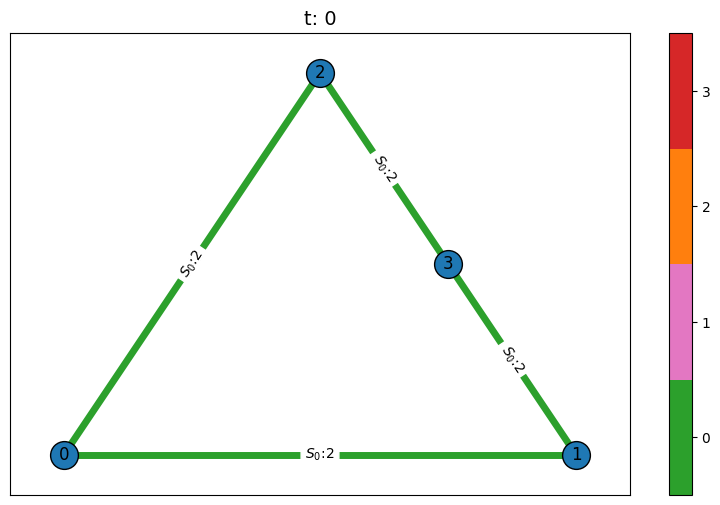

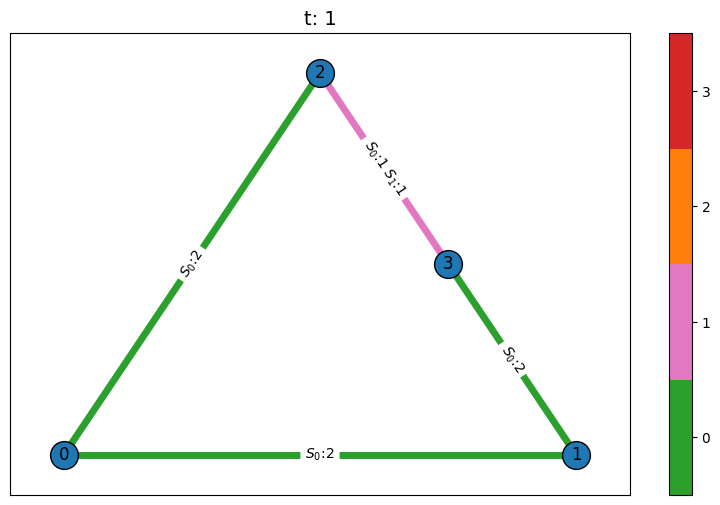

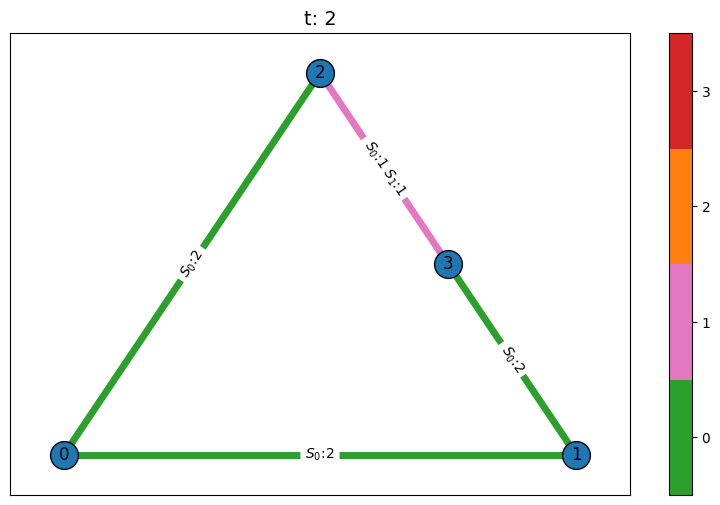

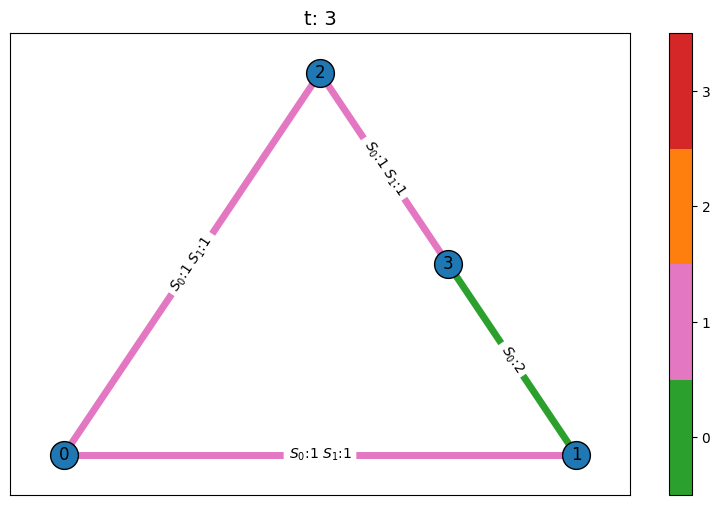

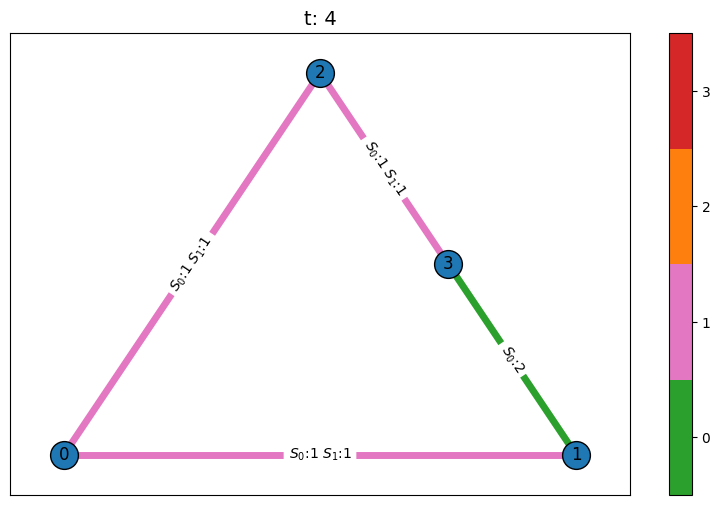

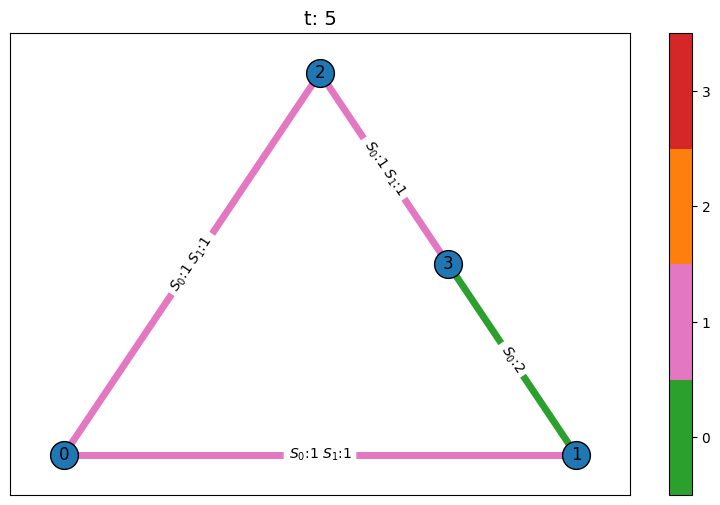

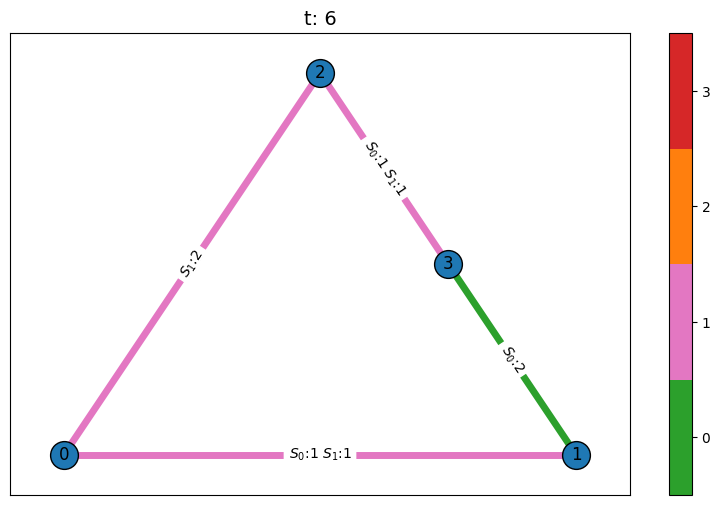

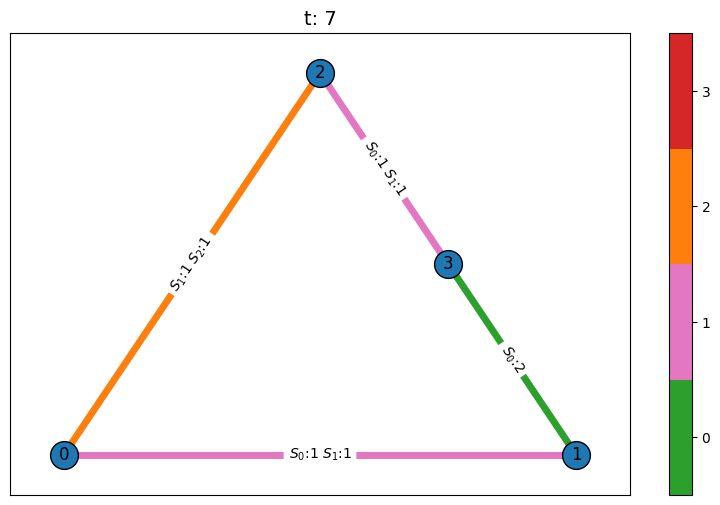

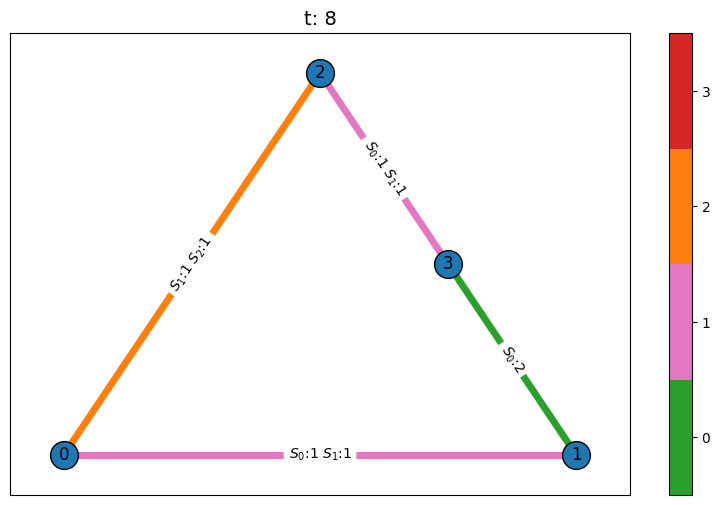

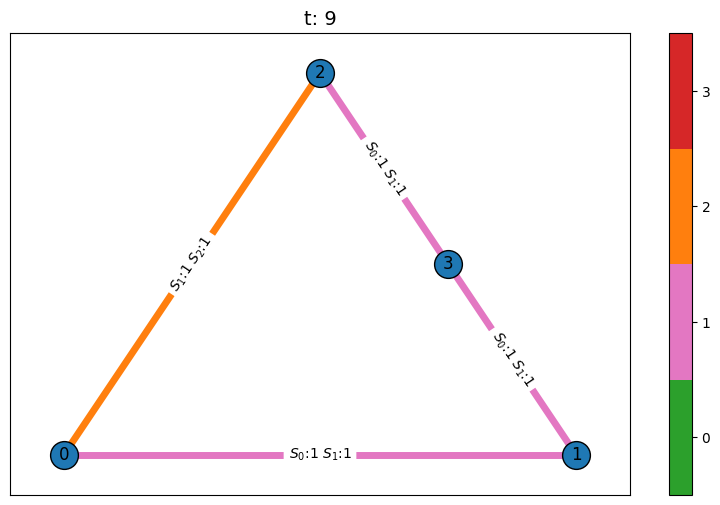

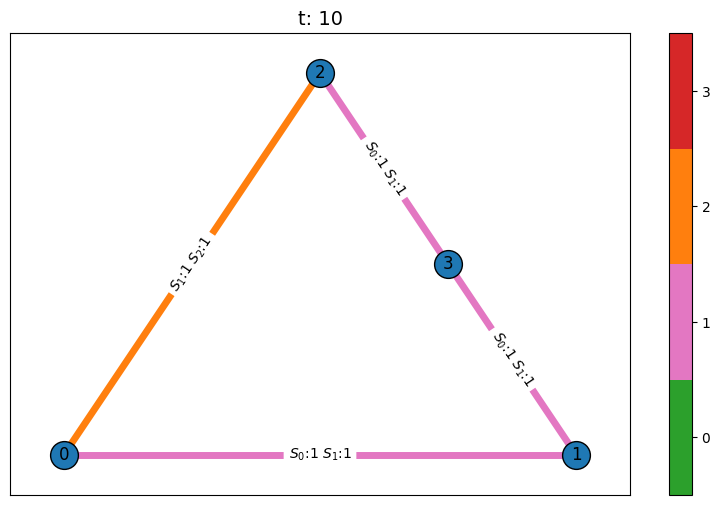

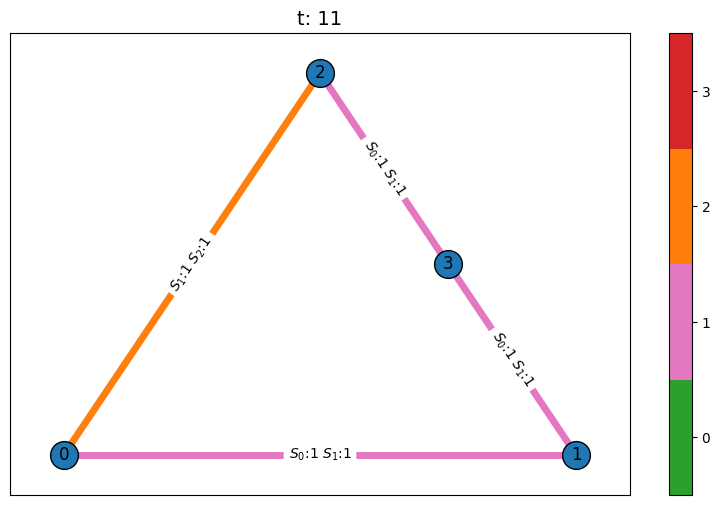

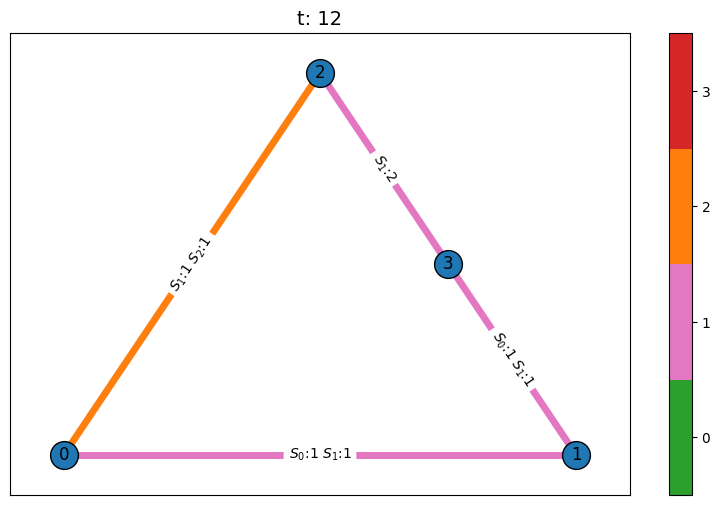

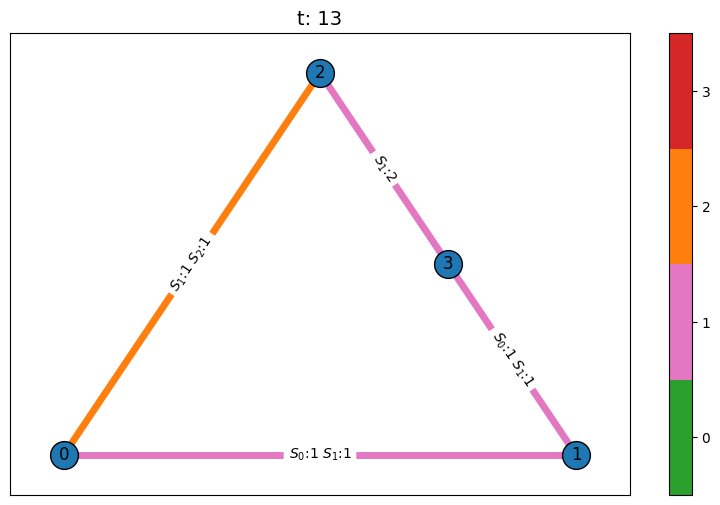

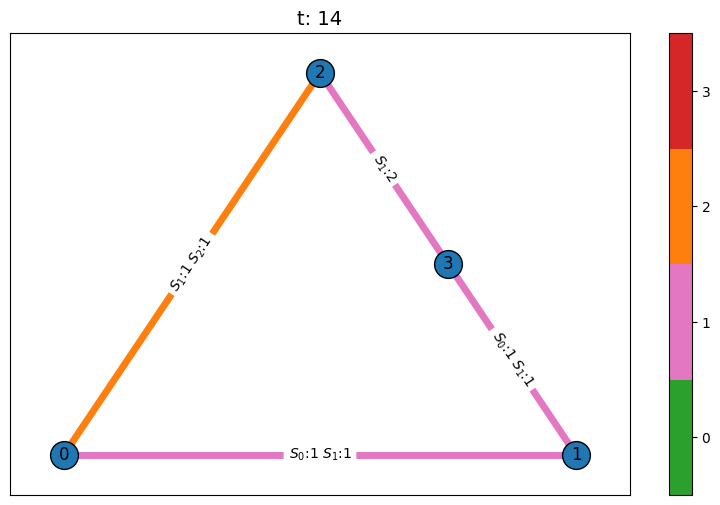

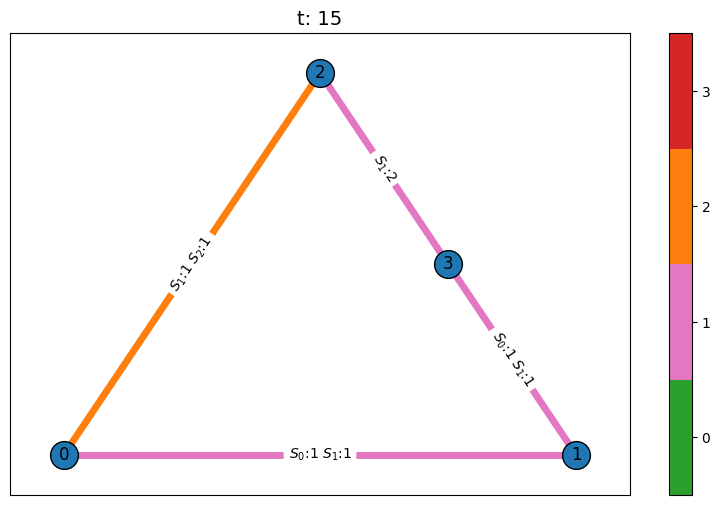

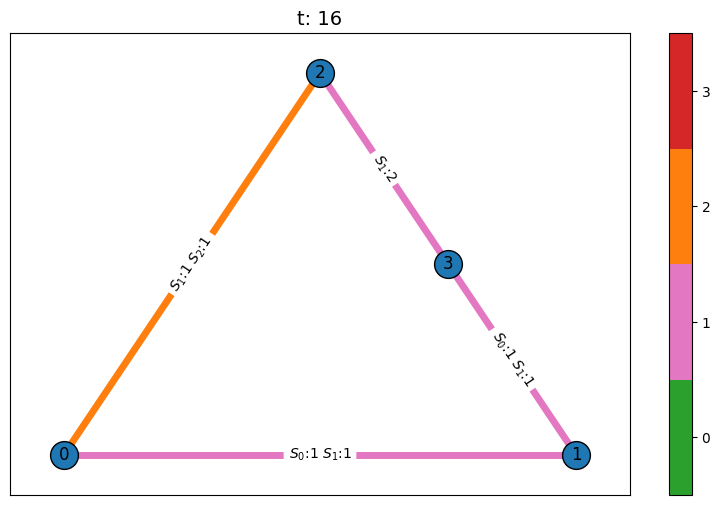

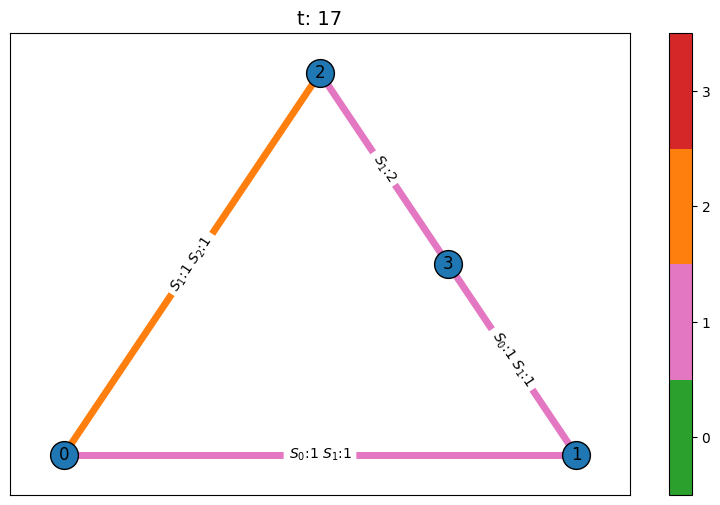

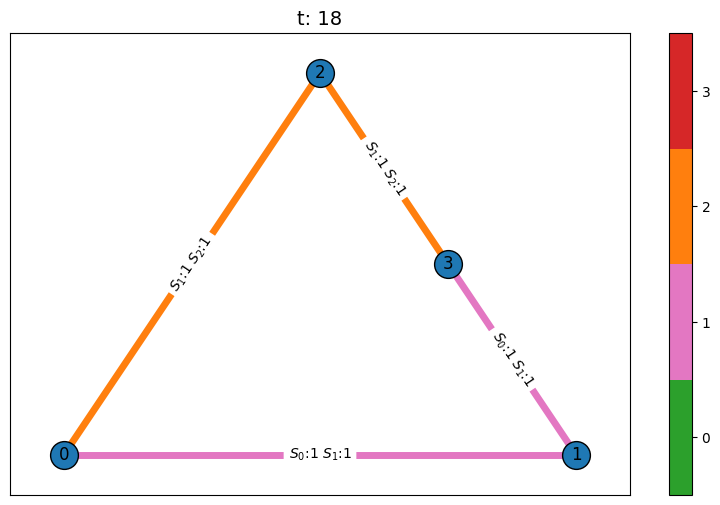

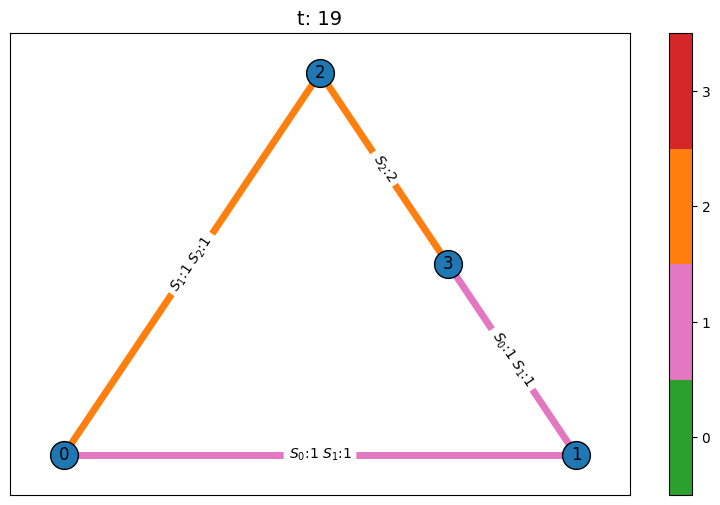

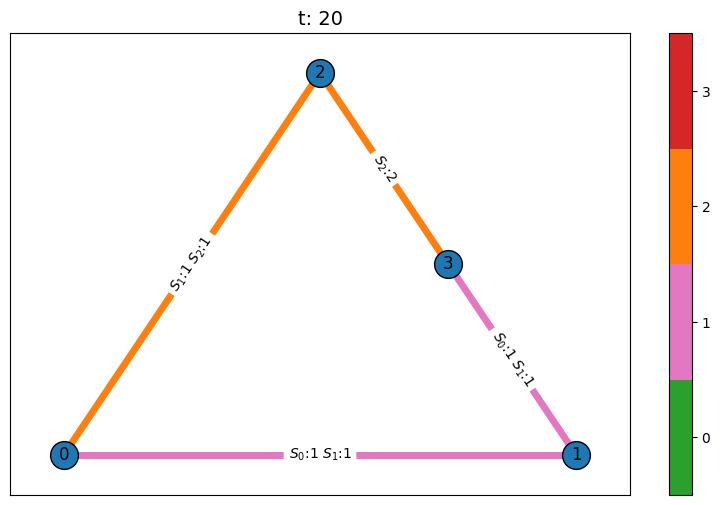

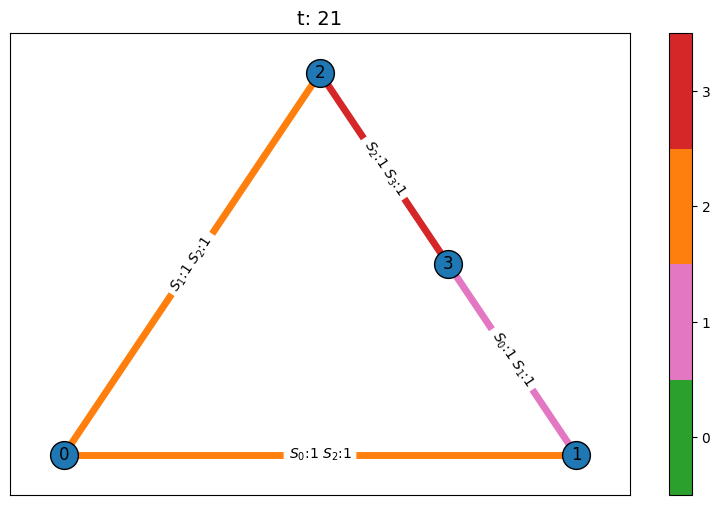

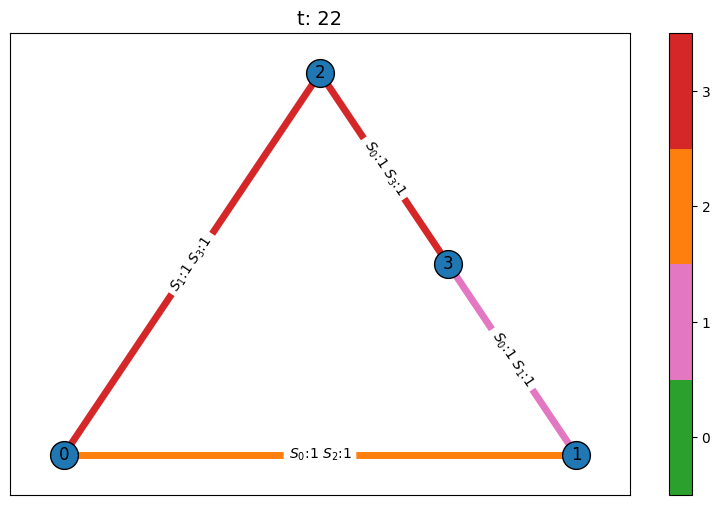

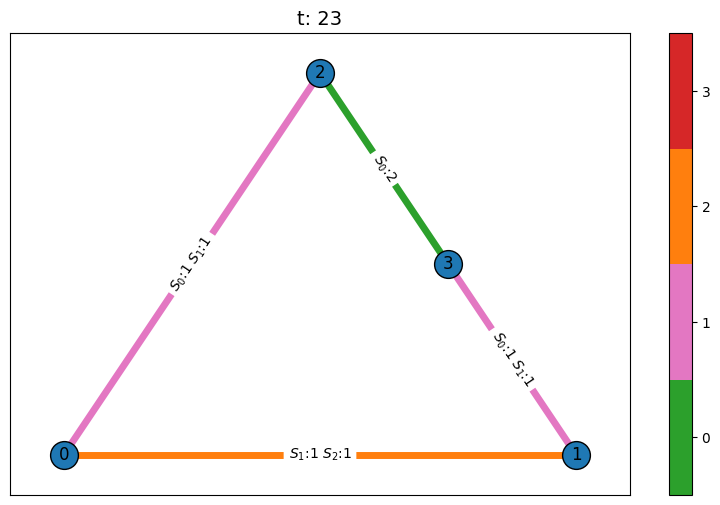

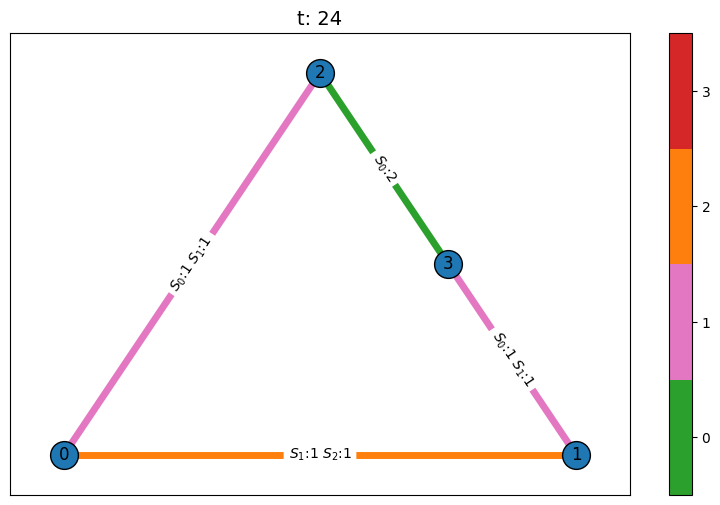

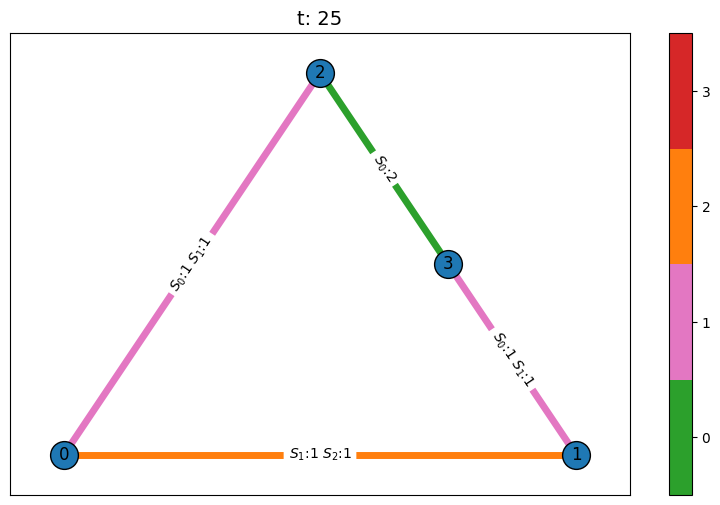

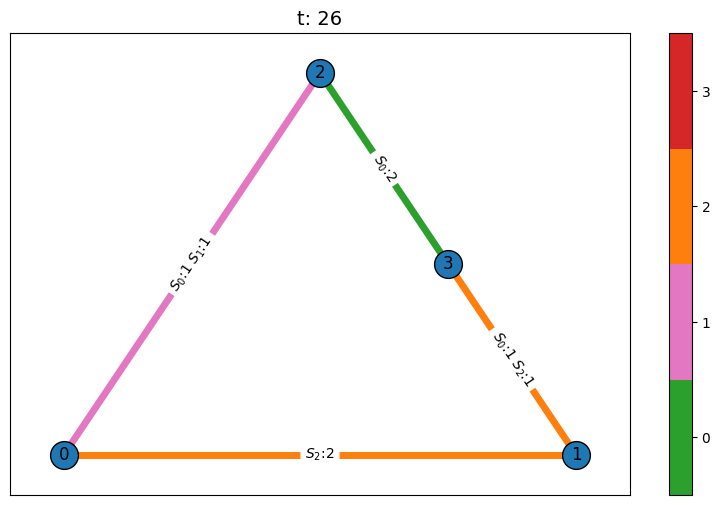

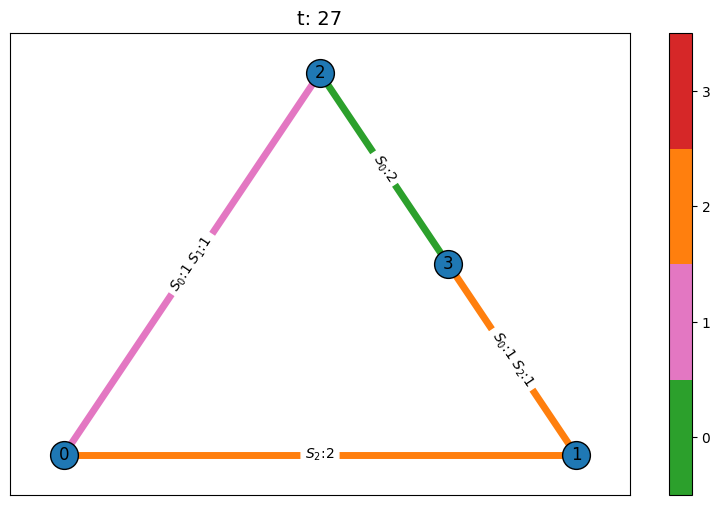

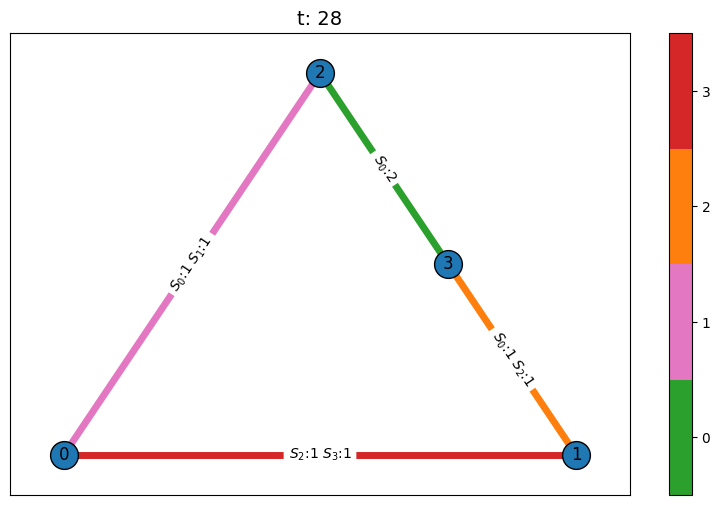

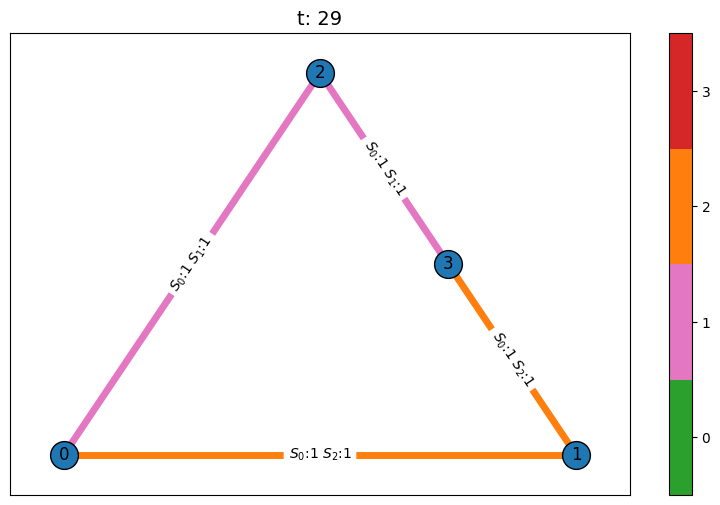

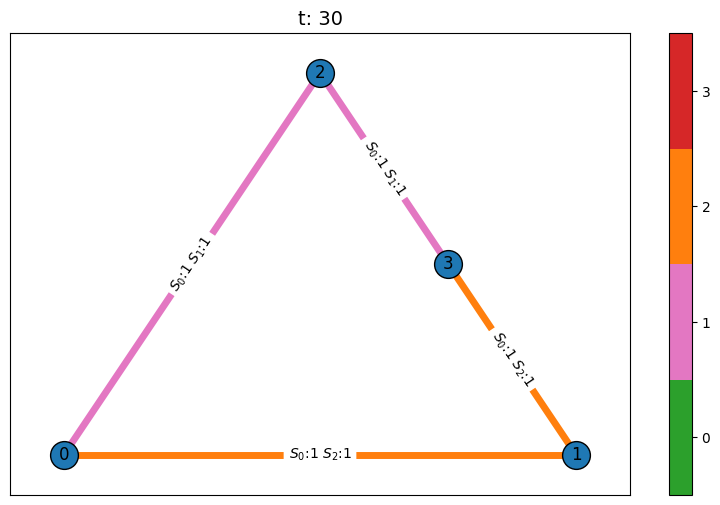

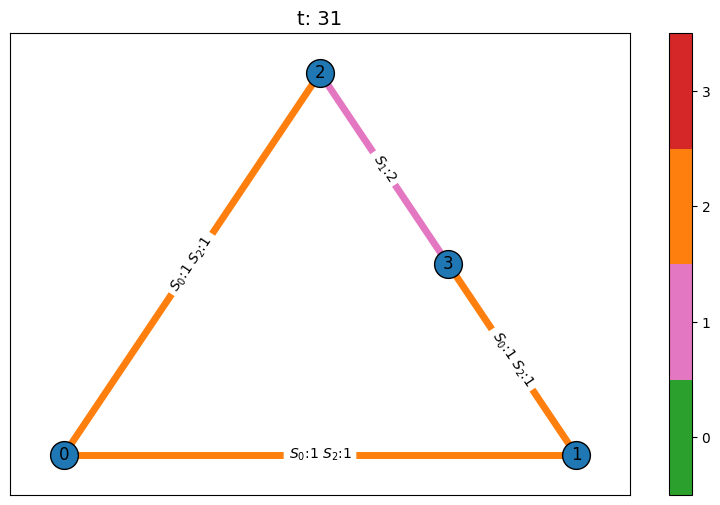

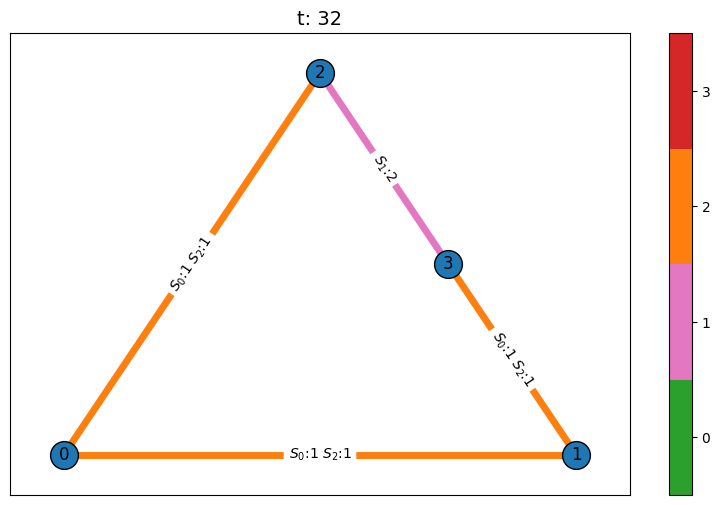

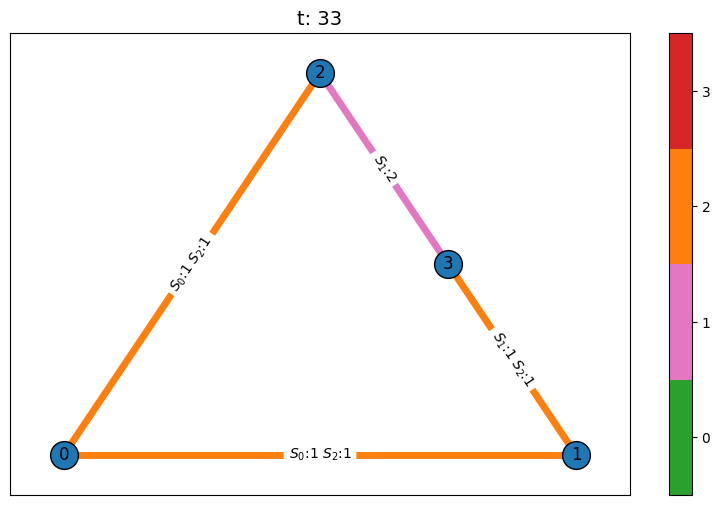

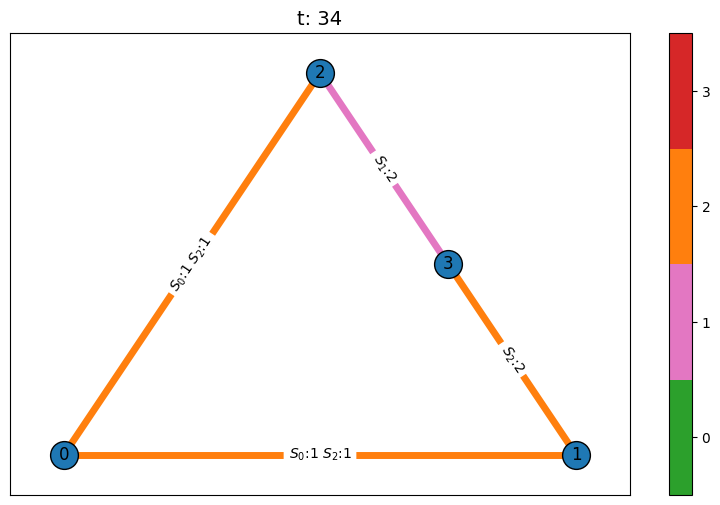

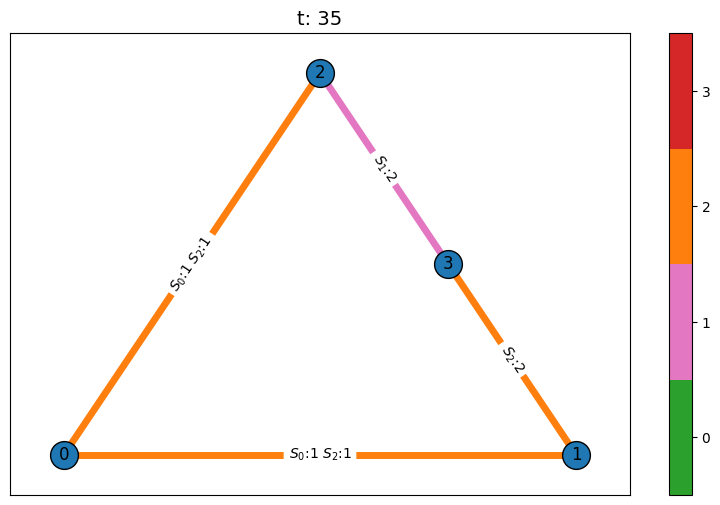

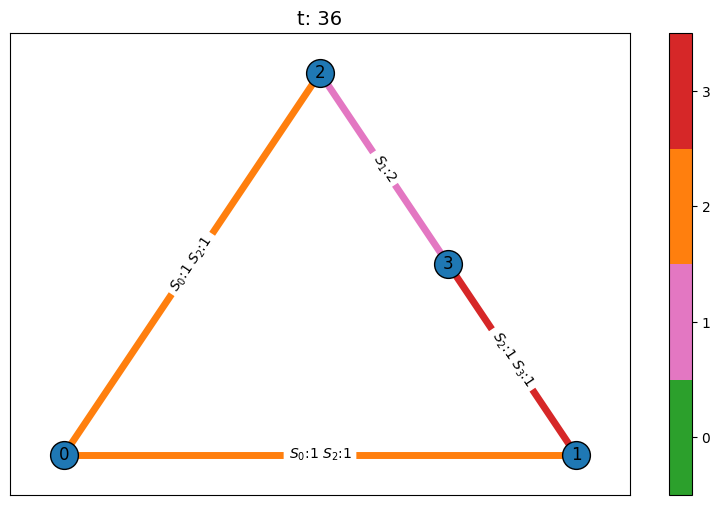

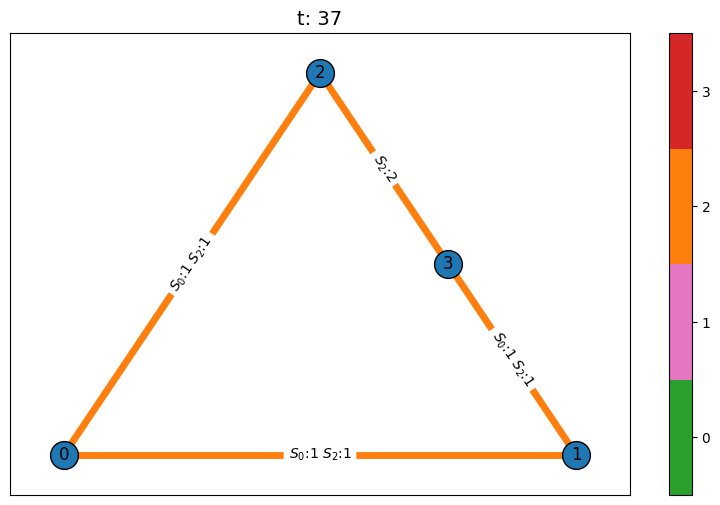

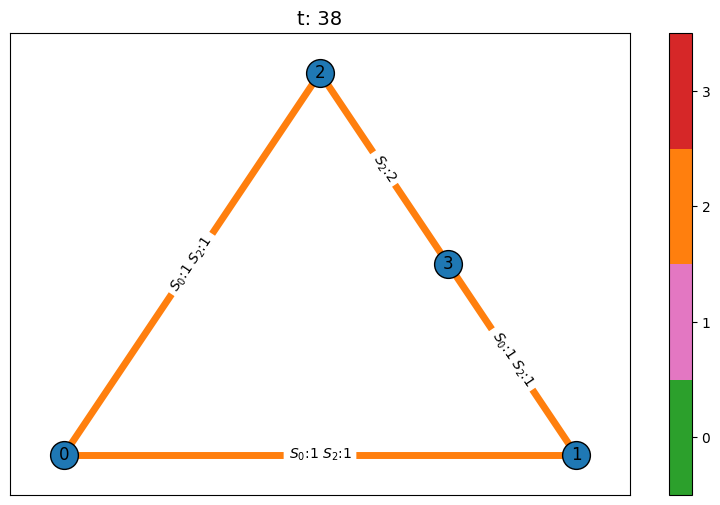

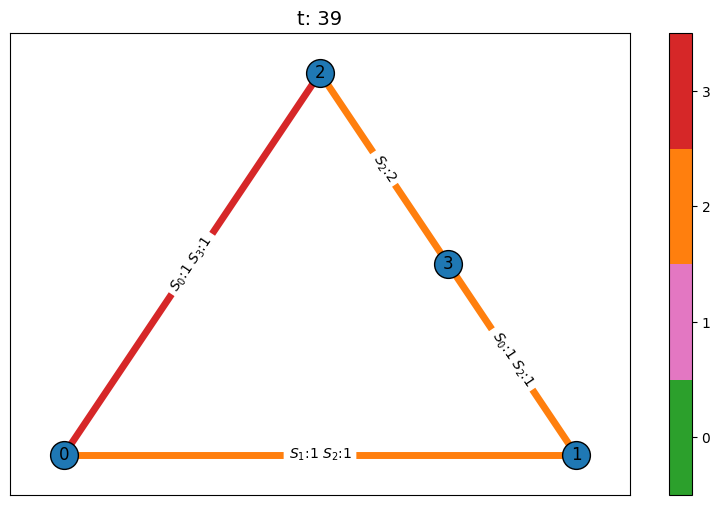

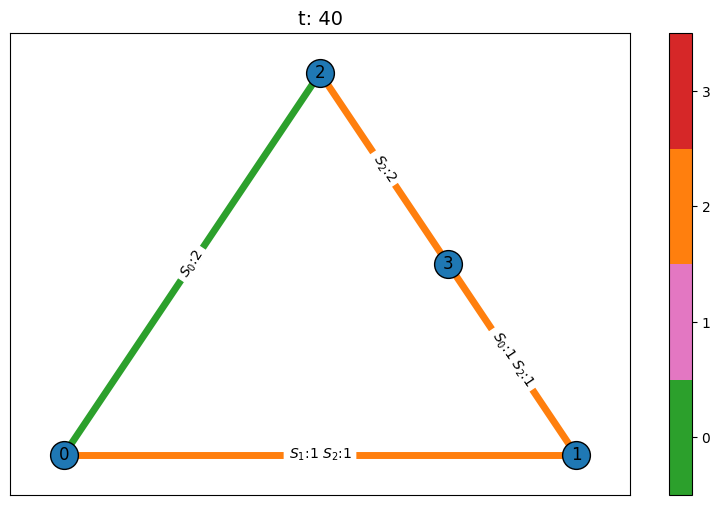

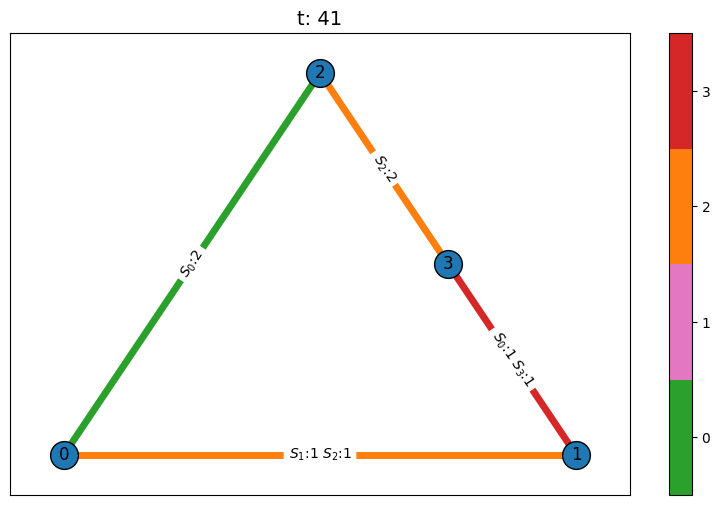

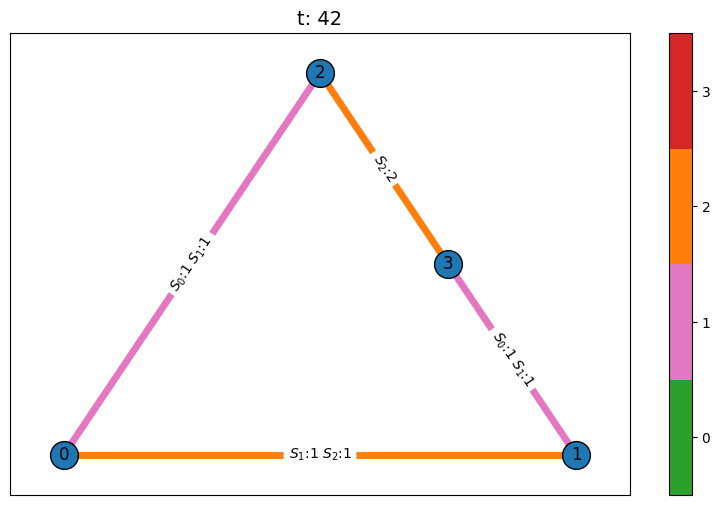

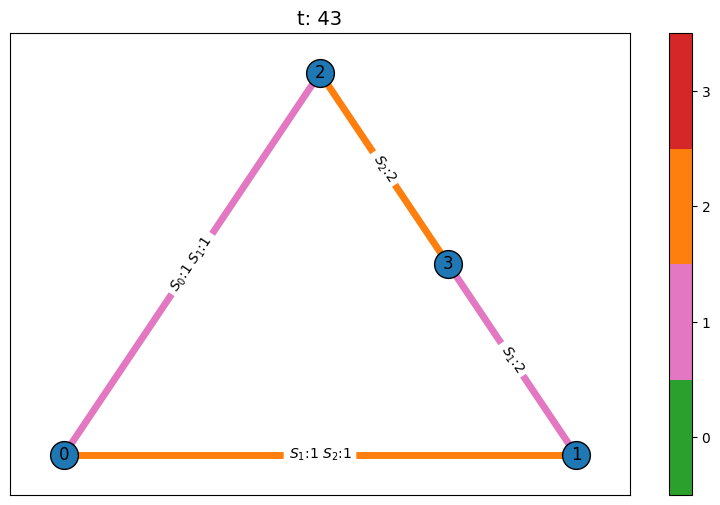

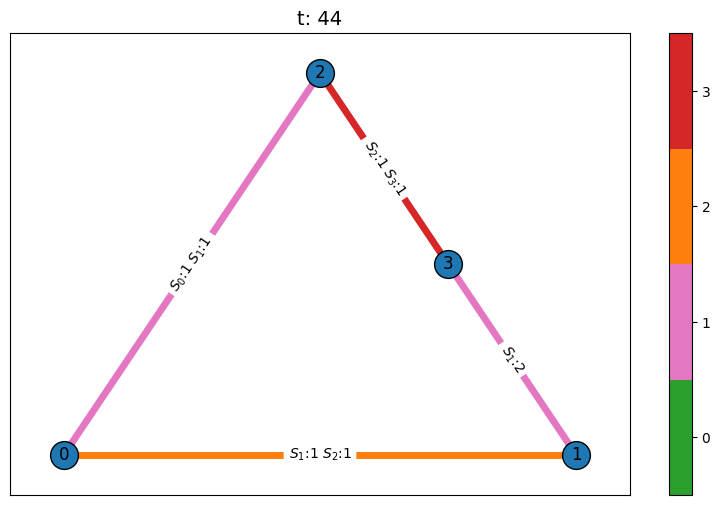

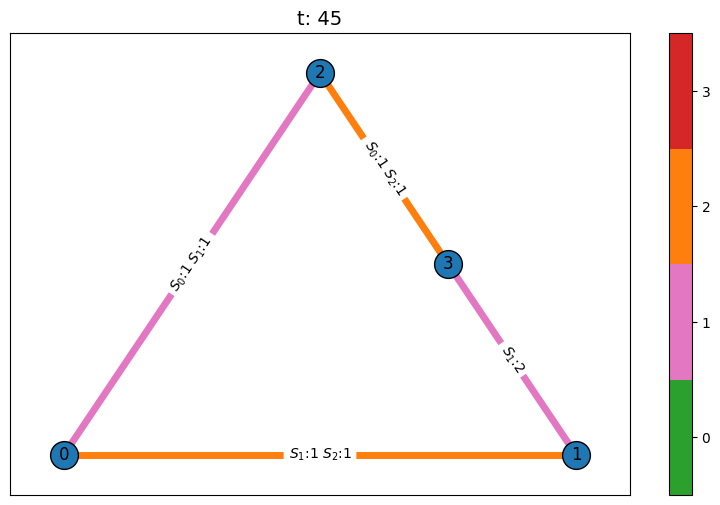

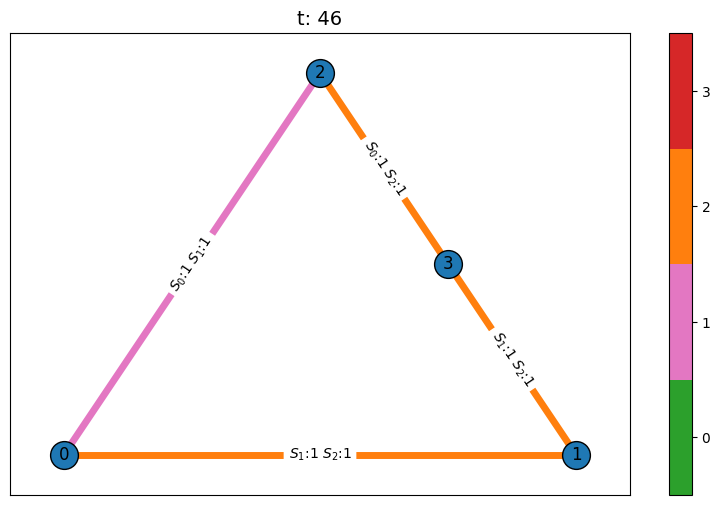

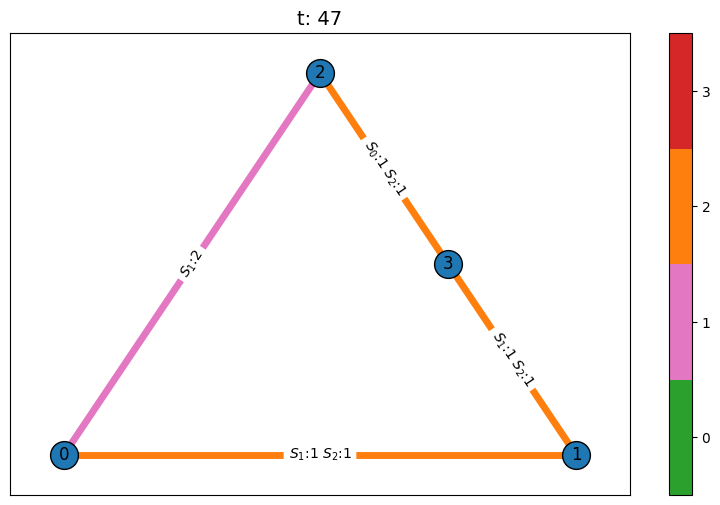

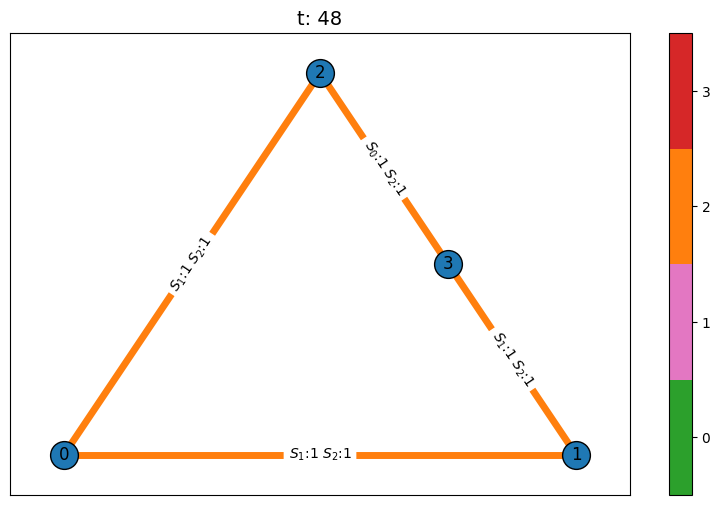

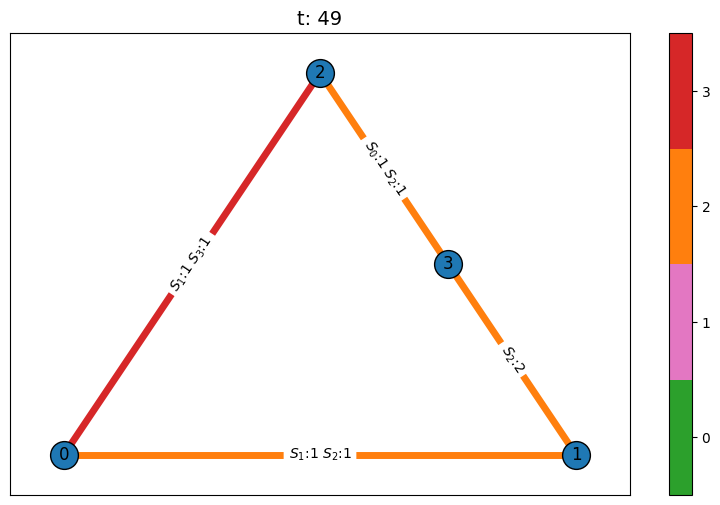

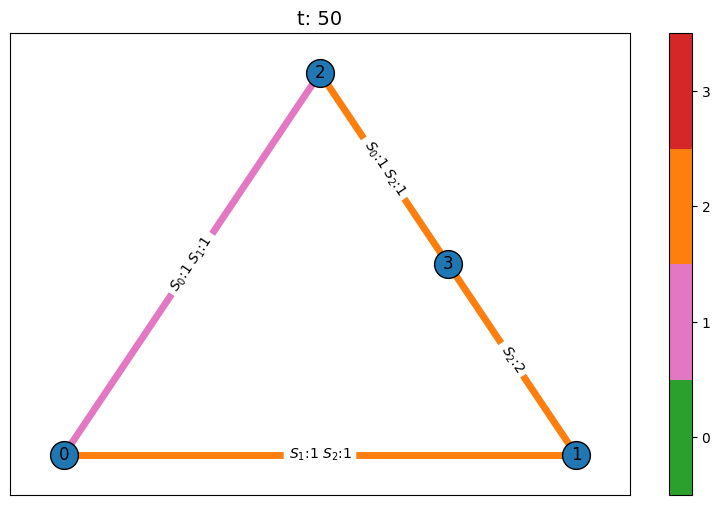

In [8]:
vis.vis_one_episode()

{(0, 1): 200, (0, 2): 200, (1, 3): 200, (2, 3): 200}
[4, 4, 4, 4]


UnboundLocalError: local variable 'pos' referenced before assignment

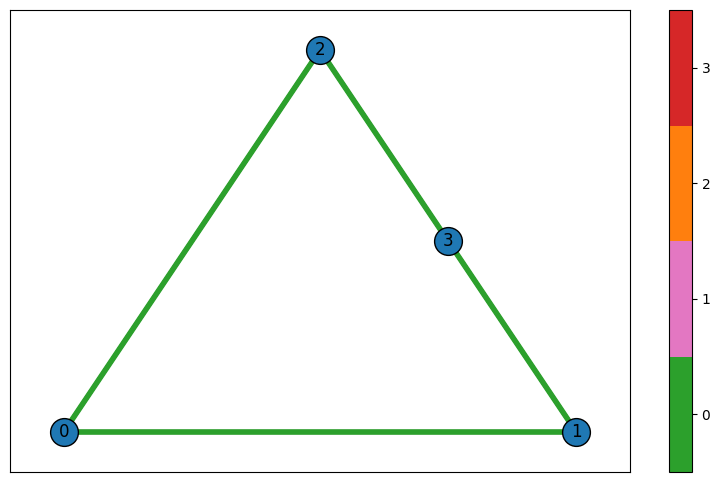

In [50]:
vis.graph_volumes(g=N)

{'node_size': 400, 'node_color': '#1f78b4', 'node_shape': 'o', 'alpha': 1.0, 'edgecolors': 'black'} {'width': 3, 'edge_color': 'black', 'style': 'solid', 'alpha': 1, 'edge_cmap': <matplotlib.colors.ListedColormap object at 0x000001C2F51AE5F0>, 'edge_vmin': 0} {'labels': {0: 0, 1: 1, 2: 2, 3: 3}, 'font_size': 12, 'font_color': 'k', 'font_family': 'sans-serif', 'clip_on': True} {'edge_labels': None, 'label_pos': 0.5, 'font_size': 10, 'font_color': 'k', 'horizontalalignment': 'center', 'verticalalignment': 'center', 'rotate': True, 'clip_on': True}


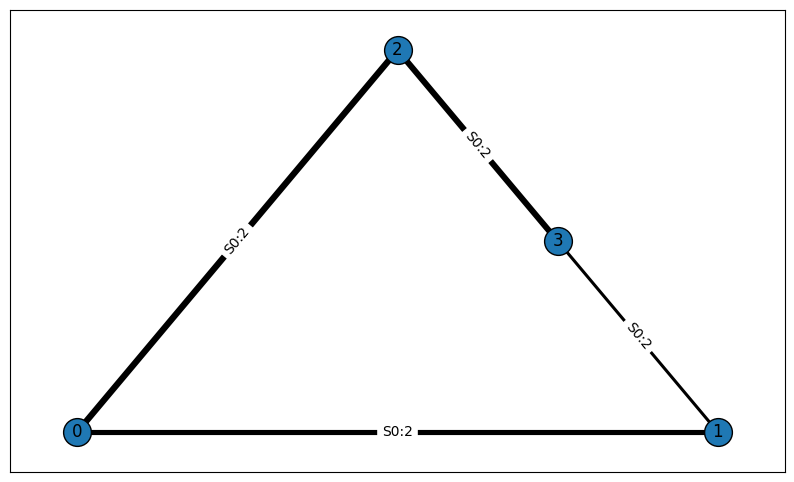

In [75]:
vis.general_plot(g=N, with_color=False, with_volumes=True, with_edge_labels=True)

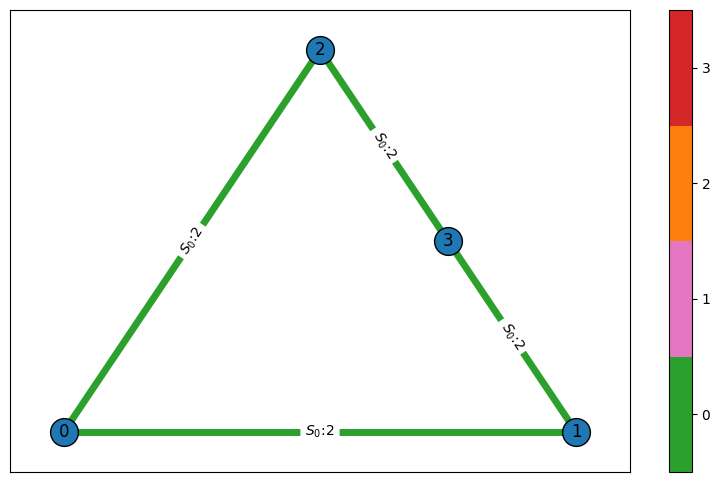

In [7]:
vis.plot_states_labels_and_volumes(g=N, return_stuff=False)

In [62]:
for e in N.edges():
    N.edges[e]['volume'] = np.random.randint(0, 200)
    print(N.edges[e]['volume'])

148
181
88
173


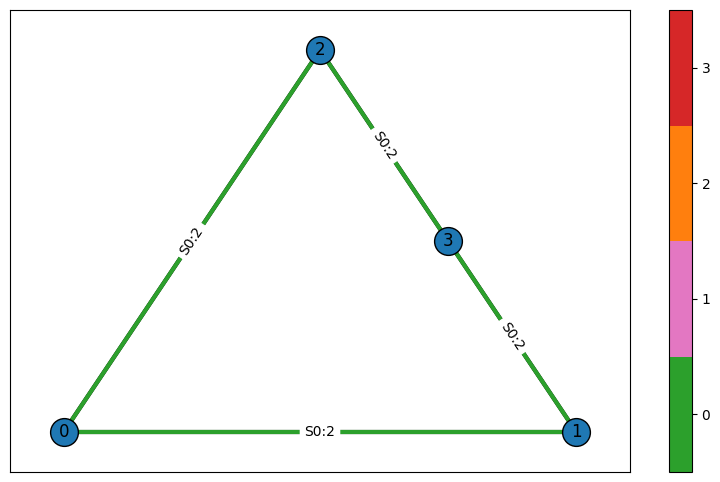

In [65]:
vis.graph_states_with_edge_labels(g=E.graph, with_color=True)

In [ ]:
show_plot = False
plt.figure()
x = np.linspace(0,1,100)
plt.plot(x,x)
if show_plot:
    plt.show(False)

In [ ]:
myutils.write_graph(g=E.graph, filename='testgraph')

In [ ]:
E2 = myutils.read_graph(filename='testgraph')

In [ ]:
E3 = myutils.unpickle_graph(filename='temp_graph')

In [ ]:
for e in E3.es:
    print(e)

In [ ]:
for e in E.graph.es:
    print(e)

In [ ]:
d = E.graph.to_dict_dict()

In [ ]:
G = nx.from_dict_of_dicts(d)

In [ ]:
G.edges

In [ ]:
for e in G.adjacency():
    print(e)

In [ ]:
d[0][1]['road_segments']

In [ ]:
for e in E2.es:
    print(e)

In [ ]:
nx.draw(G=P)

In [ ]:
nx.draw_networkx(P)

In [ ]:
vis.graph_structure(g=P)

In [ ]:
layout_dict = {'shell': nx.shell_layout, 'planar': nx.planar_layout, 'kamada_kawai': nx.kamada_kawai_layout}

In [ ]:
layout_dict['planar'](P)

In [ ]:
a = [n for n in P.nodes()]

In [ ]:
type(a[0])

In [ ]:
vis.graph_structure(g=P, layout='kamada_kawai')

In [ ]:
a = [e for e in P.edges()]

In [ ]:
P.nodes

In [ ]:
for e in P.adjacency():
    for v in e[1].values():
        print([s.state for s in v['road_segments'].segments])
        #for s in e[1][k]['road_segments'].segments:
        #    print(s.number_of_states)
        #    break

In [ ]:
for k in P.edges():
    print(P.edges[k])
    print(k['road_segments'])

In [ ]:
P.edges[0,2]['road_segments'].segments

In [ ]:
for e in P.edges():
    for s in P.edges[e]['road_segments'].segments:
        s.state = np.random.randint(4) 
        print(s.state)

In [ ]:
vis.graph_states(g=P, use_cmap=True)

In [ ]:
vis.graph_states(g=E.graph, use_cmap=True)

In [ ]:
cmap

In [ ]:
len(iter([0,0,0]))

In [ ]:
next(iter(next(iter(P.adjacency()))[1].values()))['road_segments'].segments[0].number_of_states

In [ ]:
for e in P.adjacency():
    print(e)

In [ ]:
labels.items()

In [ ]:
for e in P.nodes:
    print(e, type(e))

In [ ]:
ng = myutils.convert_graph_to_nx(g=E.graph)

In [ ]:
P = E.graph.to_networkx()

In [ ]:
for e in P.adjacency():
    print(e)

In [ ]:
E.graph

In [ ]:
for e in E.graph.vs:
    print(e.index, type(str(e.index)))

In [ ]:
vis.graph_structure(g=E.graph)

In [ ]:
E.graph.vs()

In [ ]:
standard_plot = {'vertex_size': 30, 'vertex_color': 'red', 'vertex_shape': 'circle', 'vertex_label_size': 10, 
                 'edge_width': 4, 'edge_color': 'black',
                 'autocurve': True, 'layout': 'auto', 'bbox': (0, 0, 800, 800)}

In [ ]:
fig, ax = plt.subplots()
p = ig.plot(obj=E.graph, vertex_label=[k for k in range(4)], **standard_plot, target=ax)
plt.xlabel('hello')
plt.show()

In [ ]:
for e in E.graph.es:
    print(max(s.state for s in e['road_segments'].segments))

In [ ]:
for e in E.graph.es:
    for s in e['road_segments'].segments:
        s.state = np.random.randint(0,4)

In [ ]:
vis.graph_states(g = E.graph)

In [ ]:
ig.plot(obj=E.graph, vertex_label=[k for k in range(4)], **standard_plot, target=ax)
plt.show()

In [ ]:
p = vis.graph_structure(g=E.graph, save=True, filename='hello')